# My first generative model

## Datos

In [1]:
# Datos
import numpy as np
import matplotlib.pyplot as plt

# Create a bimodal distribution with a mixture of Normals.
from scipy.stats import norm

x1 = norm.rvs(size=100,loc=0,scale=3) # parameters (size=None,loc=mean,scale=stdev)
x2 = norm.rvs(size=50,loc=8,scale=1)

# Append by row
x = np.r_[x1, x2] # r_ Translates slice objects to concatenation along the first axis.

## PDF
histograma, KDE o modelo

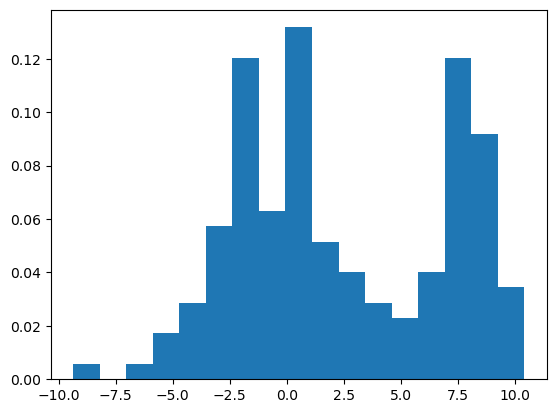

In [2]:
# Histograma
#The simplest non-parametric technique for density estimation is the histogram.
plt.hist(x, bins=17, density=True)
plt.show()

/tmp/ipykernel_6683/3300910828.py:4: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  density = kde.gaussian_kde(x)


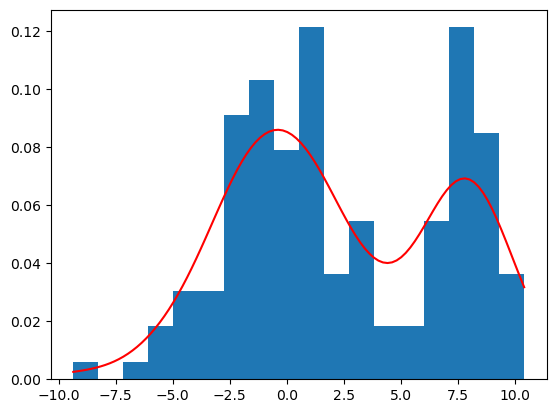

In [3]:
# KDE
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=18, density=True)
plt.plot(xgrid, density(xgrid), 'r-')
plt.show()

# Compute $CDF$


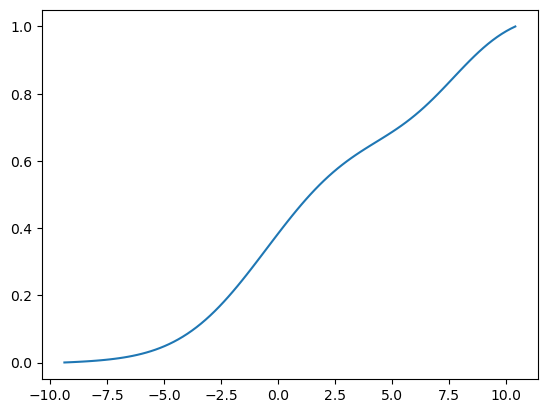

In [4]:
xgrid = np.linspace(x.min(), x.max(), 100)
d = density(xgrid)

cdf = np.cumsum(d)/np.sum(d)

plt.plot(xgrid,cdf)

# Compute $CDF^{-1}$

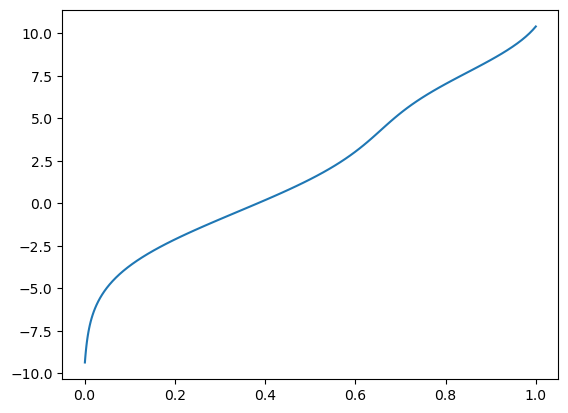

In [5]:

plt.plot(cdf,xgrid)

# Generate Samples

In [6]:
xx = np.random.rand(10000)

yy = np.interp(xx,cdf,xgrid)


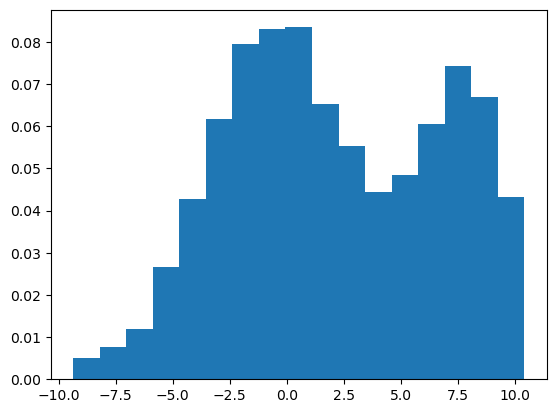

In [7]:
plt.hist(yy, bins=17, density=True)
plt.show()